In [1]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [5]:
# construct model using docplex
#mdl = Model("ex22")

#server = M = 5 = i = i0, i1, i2, i3, i4
#virtual machine = N = 3 = j = j0, j1, j2, j3, j4
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

#si0 = mdl.binary_var(name="si0")
#si1 = mdl.binary_var(name="si1")
#si2 = mdl.binary_var(name="si2")
#si3 = mdl.binary_var(name="si3")
#si4 = mdl.binary_var(name="si4")


#vj0i0 = mdl.continuous_var(name="vj0i0")
#vj1i0 = mdl.continuous_var(name="vj1i0")
#vj2i0 = mdl.continuous_var(name="vj2i0")
#vj3i0 = mdl.continuous_var(name="vj3i0")
#vj4i0 = mdl.continuous_var(name="vj4i0")
#vj0i1 = mdl.continuous_var(name="vj0i1")
#vj1i1 = mdl.continuous_var(name="vj1i1")
#vj2i1 = mdl.continuous_var(name="vj2i1")
#vj3i1 = mdl.continuous_var(name="vj3i1")
#vj4i1 = mdl.continuous_var(name="vj4i1")
#vj0i2 = mdl.continuous_var(name="vj0i2")
#vj1i2 = mdl.continuous_var(name="vj1i2")
#vj2i2 = mdl.continuous_var(name="vj2i2")
#vj3i2 = mdl.continuous_var(name="vj3i2")
#vj4i2 = mdl.continuous_var(name="vj4i2")
#vj0i3 = mdl.continuous_var(name="vj0i3")
#vj1i3 = mdl.continuous_var(name="vj1i3")
#vj2i3 = mdl.continuous_var(name="vj2i3")
#vj3i3 = mdl.continuous_var(name="vj3i3")
#vj4i3 = mdl.continuous_var(name="vj4i3")
#vj0i4 = mdl.continuous_var(name="vj0i4")
#vj1i4 = mdl.continuous_var(name="vj1i4")
#vj2i4 = mdl.continuous_var(name="vj2i4")
#vj3i4 = mdl.continuous_var(name="vj3i4")
#vj4i4 = mdl.continuous_var(name="vj4i4")

#pi = mdl.continuous_var(name="pi")
#pd = mdl.continuous_var(name="pd")
#pi = mdl.binary_var(name="pi")
#pd = mdl.binary_var(name="pd")
#pi = 10
#pd = 5

#ci0 = 100
#ci1 = 110
#ci2 = 100
#ci3 = 110
#ci4 = 120

#uj0 = mdl.continuous_var(name="uj0")
#uj1 = mdl.continuous_var(name="uj1")
#uj2 = mdl.continuous_var(name="uj2")
#uj3 = mdl.continuous_var(name="uj3")
#uj4 = mdl.continuous_var(name="uj4")
#uj2 = 70
#scrivere un admm optimmizer e print per debug di variabili
#impostare come parametri U
#uj0 = mdl.integer_var(name="uj0")
#uj1 = mdl.integer_var(name="uj1")
#uj2 = mdl.integer_var(name="uj2")
#uj3 = mdl.integer_var(name="uj3")
#uj4 = mdl.integer_var(name="uj4")

In [6]:
# construct model using docplex
mdl = Model("ex25")

#server = M = 4 = i = i0, i1, i2, i3
#virtual machine = N = 5 = j = j0, j1, j2, j3, j4
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")
vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")
vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")
vj0i3 = mdl.continuous_var(name="vj0i3")
vj1i3 = mdl.continuous_var(name="vj1i3")
vj2i3 = mdl.continuous_var(name="vj2i3")
vj3i3 = mdl.continuous_var(name="vj3i3")
vj4i3 = mdl.continuous_var(name="vj4i3")

pi = 10
pd = 5

ci0 = 100
ci1 = 110
ci2 = 100
ci3 = 90

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")

sum0 = (vj0i0+vj1i0+vj2i0+vj3i0+vj4i0)
sum1 = (vj0i1+vj1i1+vj2i1+vj3i1+vj4i1)
sum2 = (vj0i2+vj1i2+vj2i2+vj3i2+vj4i2)
sum2 = (vj0i3+vj1i3+vj2i3+vj3i3+vj4i3)

mdl.minimize(pi*si0+pd*(sum0)+pi*si1+pd*uj1*(sum1)+pi*si2+pd*(sum2))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) >= 0.9, "cons5")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) >= 0.9, "cons6")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) >= 0.9, "cons7")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) >= 0.9, "cons8")

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) <= 0.99,"cons10")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) <= 0.99, "cons11")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) <= 0.99, "cons12")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) <= 0.99, "cons13")


docplex.mp.LinearConstraint[cons13](vj0i3+vj1i3+vj2i3+vj3i3+vj4i3,LE,0.99)

In [7]:
#sum0 = (vj0i0+vj1i0+vj2i0+vj3i0+vj4i0)
#sum1 = (vj0i1+vj1i1+vj2i1+vj3i1+vj4i1)
#sum2 = (vj0i2+vj1i2+vj2i2+vj3i2+vj4i2)
#sum3 = (vj0i3+vj1i3+vj2i3+vj3i3+vj4i3)
#sum4 = (vj0i4+vj1i4+vj2i4+vj3i4+vj4i4)
#sum5 = (vj0i0+vj0i1+vj0i2+vj0i3+vj0i4)

#mdl.minimize(pi*si0+pd*uj0*(vj0i0+vj1i0+vj2i0)+pi*si1+pd*uj1*(vj0i1+vj1i1+vj2i1)+pi*si2+pd*uj2*(vj0i2+vj1i2+vj2i2))
#mdl.add_constraint(uj0*sum0 <= ci0*si0, "cons0")
#mdl.add_constraint(uj1*sum1 <= ci1*si1, "cons1")
#mdl.add_constraint(uj2*sum2 <= ci2*si2, "cons2")
#mdl.add_constraint(sum3 <= ci3*si3, "cons3")
#mdl.add_constraint(sum4 <= ci4*si4, "cons4")
#sum7 = (vj2i0+vj2i1+vj2i2)#+vj2i3)#+vj2i4)
#sum8 = (vj3i0+vj3i1+vj3i2)#+vj3i3)#+vj3i4)
#sum9 = (vj4i0+vj4i1+vj4i2)#+vj4i3)#+vj4i4)

In [8]:
#mdl.minimize((pi*si0+pd*(uj0*sum0))+(pi*si1+pd*(uj1*sum1))+(pi*si2+pd*(uj2*sum2)))
#mdl.minimize(sum5)#+sum6+sum7)
#mdl.minimize(pi*si0+pd*(uj0*(vj0i0+vj1i0+vj2i0))+pi*si1+pd*(uj0*(vj0i1+vj1i1+vj2i1))+pi*si2+pd*(uj0*(vj0i2+vj1i2+vj2i2)))
#mdl.minimize(pi*si0+pd*(uj0*vj0i0+uj1*vj1i0)+pi*si1+pd*(uj0*vj0i1+uj1*vj1i1)+pi*si2+pd*(uj0*vj0i2+uj1*vj1i2)+pi*si3+pd*(uj0*vj0i3+uj1*vj1i3)+pi*si4+pd*(uj0*vj0i4+uj1*vj1i4))
#mdl.minimize(pi*si0+pd*(sum0)+pi*si1+pd*uj1*(sum1)+pi*si2+pd*(sum2)+pi*si3+pd*(sum3)+pi*si4+pd*(sum4))
#mdl.add_constraint(uj0*sum0 <= ci0*si0, "cons0")
#mdl.add_constraint(uj1*sum1 <= ci1*si1, "cons1")
#mdl.add_constraint(uj2*sum2 <= ci2*si2, "cons2")
#mdl.add_constraint(sum3 <= ci3*si3, "cons3")
#mdl.add_constraint(sum4 <= ci4*si4, "cons4")
#mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) >= 0.9, "cons5")
#mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) >= 0.9, "cons6")
#mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) >= 0.9, "cons7")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) >= 0.9, "cons8")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4) >= 0.9, "cons9")
#mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) <= 0.99,"cons10")
#mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) <= 0.99, "cons11")
#mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) <= 0.99, "cons12")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) <= 0.99, "cons13")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4) <= 0.99, "cons14")
#mdl.add_constraint(sum8 == 1, "cons8")
#mdl.add_constraint(sum9 == 1, "cons9")
#mdl.add_constraint(uj0 <= ci0, "cons10")
#mdl.add_constraint(uj1 <= ci1, "cons11")
#mdl.add_constraint(uj2 <= ci2, "cons12")
#mdl.add_constraint(uj3 <= ci3, "cons13")
#mdl.add_constraint(uj4 <= ci4, "cons14")
#mdl.add_constraint(uj0 >= 1, "cons15")
#mdl.add_constraint(uj1 >= 1, "cons16")                  
#mdl.add_constraint(uj2 >= 1, "cons17")
#mdl.add_constraint(uj3 >= 1, "cons18")
#mdl.add_constraint(uj4 >= 1, "cons19")
#mdl.add_constraint(si0 == 1, "cons20")
#mdl.add_constraint(si1 == 1, "cons21")                  
#mdl.add_constraint(si2 == 1, "cons22")
#mdl.add_constraint(si3 >= 1, "cons23")
#mdl.add_constraint(si4 >= 1, "cons24")
#mdl.add_constraint((uj0*(vj0i0+vj0i1+vj0i2+vj0i3+vj0i4)) <= ci0*si0, "cons25")
#mdl.add_constraint((uj1*(vj1i0+vj1i1+vj1i2+vj1i3+vj1i4)) <= ci1*si1, "cons26")
#mdl.add_constraint((uj0*vj0i0+uj1*vj1i0 <= ci0*si0), "cons27")
#mdl.add_constraint((uj0*vj0i1+uj1*vj1i1 <= ci1*si1), "cons28")
#mdl.add_constraint((uj0*vj0i2+uj1*vj1i2 <= ci2*si2), "cons29")
#mdl.add_constraint((uj0*vj0i3+uj1*vj1i3 <= ci3*si3), "cons30")
#mdl.add_constraint((uj0*vj0i4+uj1*vj1i4 <= ci4*si4), "cons31")


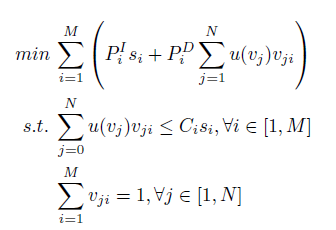

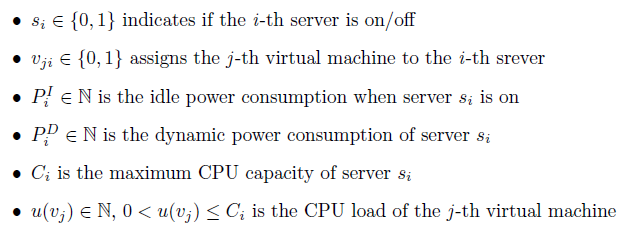

In [9]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex25

Minimize
 obj: 10 si0 + 10 si1 + 10 si2 + 5 vj0i0 + 5 vj1i0 + 5 vj2i0 + 5 vj3i0 + 5 vj4i0
      + 5 vj0i3 + 5 vj1i3 + 5 vj2i3 + 5 vj3i3 + 5 vj4i3 + [ 10 vj0i1*uj1
      + 10 vj1i1*uj1 + 10 vj2i1*uj1 + 10 vj3i1*uj1 + 10 vj4i1*uj1 ]/2
Subject To
 cons5: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 >= 0.900000000000
 cons6: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 >= 0.900000000000
 cons7: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 >= 0.900000000000
 cons8: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 >= 0.900000000000
 cons10: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 <= 0.990000000000
 cons11: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 <= 0.990000000000
 cons12: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 <= 0.990000000000
 cons13: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 <= 0.990000000000

Bounds
 0 <= si0 <= 1
 0 <= si1 <= 1
 0 <= si2 <= 1
 0 <= si3 <= 1

Binaries
 si0 si1 si2 si3
End



In [10]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [11]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [12]:
# run ADMM to solve problem
#%tb
%timeit
result = admm.solve(qp)

In [13]:
print(result.prettyprint())

objective function value: 9.0
variable values: si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.1840477276751636, vj1i0=0.18353546628213085, vj2i0=0.18044724665579134, vj3i0=0.17920431290064365, vj4i0=0.17276524648627078, vj0i1=0.18105579920342185, vj1i1=0.17974649402565068, vj2i1=0.17957657008804073, vj3i1=0.1796254137422331, vj4i1=0.18026685221314956, vj0i2=0.17783767599662914, vj1i2=0.18185149733666628, vj2i2=0.18022118053455208, vj3i2=0.1800584164837922, vj4i2=0.18148906767007258, vj0i3=0.17778249725920123, vj1i3=0.18197307024369364, vj2i3=0.1781623623796032, vj3i3=0.1806272252974847, vj4i3=0.18145484482001717, uj0=0.0025132913483920196, uj1=-7.20947497743606e-20, uj2=0.00033629132837000486, uj3=7.704874589619539e-05, uj4=1.266558573320812e-05
status: INFEASIBLE


In [14]:
print(f"Values:\nvj0i0=0.1840477276751636, vj1i0=0.18353546628213085, vj2i0=0.18044724665579134, vj3i0=0.17920431290064365, vj4i0=0.17276524648627078,\nvj0i1=0.18105579920342185, vj1i1=0.17974649402565068, vj2i1=0.17957657008804073, vj3i1=0.1796254137422331, vj4i1=0.18026685221314956,\nvj0i2=0.17783767599662914, vj1i2=0.18185149733666628, vj2i2=0.18022118053455208, vj3i2=0.1800584164837922, vj4i2=0.18148906767007258,\nvj0i3=0.17778249725920123, vj1i3=0.18197307024369364, vj2i3=0.1781623623796032, vj3i3=0.1806272252974847, vj4i3=0.18145484482001717\nuj0=0.000976854953176434, uj1=4.647102524485434e-19, uj2=0.0005536291149654766, uj3=0.00245532313382543, uj4=0.013541602527421728")

Values:
vj0i0=0.1840477276751636, vj1i0=0.18353546628213085, vj2i0=0.18044724665579134, vj3i0=0.17920431290064365, vj4i0=0.17276524648627078,
vj0i1=0.18105579920342185, vj1i1=0.17974649402565068, vj2i1=0.17957657008804073, vj3i1=0.1796254137422331, vj4i1=0.18026685221314956,
vj0i2=0.17783767599662914, vj1i2=0.18185149733666628, vj2i2=0.18022118053455208, vj3i2=0.1800584164837922, vj4i2=0.18148906767007258,
vj0i3=0.17778249725920123, vj1i3=0.18197307024369364, vj2i3=0.1781623623796032, vj3i3=0.1806272252974847, vj4i3=0.18145484482001717
uj0=0.000976854953176434, uj1=4.647102524485434e-19, uj2=0.0005536291149654766, uj3=0.00245532313382543, uj4=0.013541602527421728


In [15]:
vj0i0_sol=0.1840477276751636
vj1i0_sol=0.18353546628213085
vj2i0_sol=0.18044724665579134
vj3i0_sol=0.17920431290064365
vj4i0_sol=0.17276524648627078

vj0i1_sol=0.18105579920342185
vj1i1_sol=0.17974649402565068
vj2i1_sol=0.17957657008804073
vj3i1_sol=0.1796254137422331
vj4i1_sol=0.18148906767007258

vj0i2_sol=0.17783767599662914
vj1i2_sol=0.18185149733666628
vj2i2_sol=0.18022118053455208
vj3i2_sol=0.1800584164837922
vj4i2_sol=0.18148906767007258

vj0i3_sol=0.17778249725920123
vj1i3_sol=0.18197307024369364
vj2i3_sol=0.1781623623796032
vj3i3_sol=0.1806272252974847
vj4i3_sol=0.18145484482001717

uj0_sol=0.000976854953176434
uj1_sol=4.647102524485434e-19
uj2_sol=0.0005536291149654766
uj3_sol=0.00245532313382543
uj4_sol=0.013541602527421728

vi0_sol=vj0i0_sol+vj1i0_sol+vj2i0_sol+vj3i0_sol+vj4i0_sol
vi1_sol=vj0i1_sol+vj1i1_sol+vj2i1_sol+vj3i1_sol+vj4i1_sol
vi2_sol=vj0i2_sol+vj1i2_sol+vj2i2_sol+vj3i2_sol+vj4i2_sol
vi3_sol=vj0i3_sol+vj1i3_sol+vj2i2_sol+vj3i3_sol+vj4i3_sol

vj0_sol=vj0i0_sol+vj0i1_sol+vj0i2_sol+vj0i3_sol
vj1_sol=vj1i0_sol+vj1i1_sol+vj1i2_sol+vj1i3_sol
vj2_sol=vj2i0_sol+vj2i1_sol+vj2i2_sol+vj2i3_sol
vj3_sol=vj3i0_sol+vj3i1_sol+vj3i2_sol+vj3i3_sol
vj4_sol=vj4i0_sol+vj4i1_sol+vj4i2_sol+vj4i3_sol

print("vi0_sol = ",vi0_sol,"\nvi1_sol = ",vi1_sol,"\nvi2_sol = ",vi2_sol,"\nvi3_sol = ",vi3_sol)
print("vj0_sol = ",vj0_sol,"\nvj1_sol = ",vj1_sol,"\nvj2_sol = ",vj2_sol,"\nvj3_sol = ",vj3_sol,"\nvj4_sol = ",vj4_sol)

vi0_sol =  0.9000000000000002 
vi1_sol =  0.9014933447294189 
vi2_sol =  0.9014578380217122 
vi3_sol =  0.9020588181549488
vj0_sol =  0.7207237001344159 
vj1_sol =  0.7271065278881415 
vj2_sol =  0.7184073596579874 
vj3_sol =  0.7195153684241535 
vj4_sol =  0.7171982266464331


In [16]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

x=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.84047728e-01  1.83535466e-01  1.80447247e-01  1.79204313e-01
  1.72765246e-01  1.81055799e-01  1.79746494e-01  1.79576570e-01
  1.79625414e-01  1.80266852e-01  1.77837676e-01  1.81851497e-01
  1.80221181e-01  1.80058416e-01  1.81489068e-01  1.77782497e-01
  1.81973070e-01  1.78162362e-01  1.80627225e-01  1.81454845e-01
  2.51329135e-03 -7.20947498e-20  3.36291328e-04  7.70487459e-05
  1.26655857e-05]
fval=9.0000000
x=[0.0001000000000000018, 0.00012844479714264523, 0.0001656231011389354, 5.2407516307523294e-05, 5.868225962569627e-05, 5.524186778360474e-05, 8.556148117362722e-05, 8.309208643559455e-05, 0.00012680321608320147, 0.00012013021266304066, 0.0001534834611311863, 0.00018077679031780047, 0.00013278083255845137, 9.756461765777996e-05, 0.0001692747985052222, 6.726428345694659e-05, 5.980337983289693e-05, 8.767505017205639e-05, 0.00012643939205519422, 0.00010283777817183473, 0.00013179300649983664, 0.0002164965670

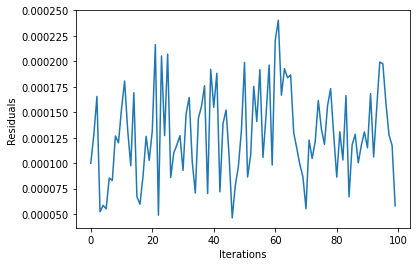

In [17]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [18]:
lista = []
lista = result.state.residuals

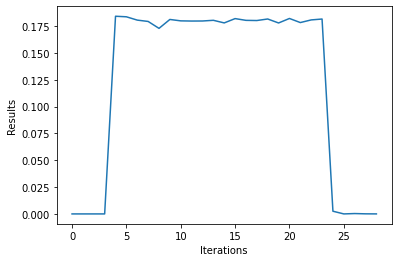

In [19]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.show()

In [20]:
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots()
#
#f = [result.x]
#c = [40, 100, 30, 55]
#
#ax.bar(f, c,)
#
#ax.set_ylabel("Residuals")
#ax.set_title("Results")
#
#
#plt.show()

In [21]:
print(result.x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.84047728e-01  1.83535466e-01  1.80447247e-01  1.79204313e-01
  1.72765246e-01  1.81055799e-01  1.79746494e-01  1.79576570e-01
  1.79625414e-01  1.80266852e-01  1.77837676e-01  1.81851497e-01
  1.80221181e-01  1.80058416e-01  1.81489068e-01  1.77782497e-01
  1.81973070e-01  1.78162362e-01  1.80627225e-01  1.81454845e-01
  2.51329135e-03 -7.20947498e-20  3.36291328e-04  7.70487459e-05
  1.26655857e-05]


In [22]:
result

<ADMMOptimizationResult: fval=9.0, si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.1840477276751636, vj1i0=0.18353546628213085, vj2i0=0.18044724665579134, vj3i0=0.17920431290064365, vj4i0=0.17276524648627078, vj0i1=0.18105579920342185, vj1i1=0.17974649402565068, vj2i1=0.17957657008804073, vj3i1=0.1796254137422331, vj4i1=0.18026685221314956, vj0i2=0.17783767599662914, vj1i2=0.18185149733666628, vj2i2=0.18022118053455208, vj3i2=0.1800584164837922, vj4i2=0.18148906767007258, vj0i3=0.17778249725920123, vj1i3=0.18197307024369364, vj2i3=0.1781623623796032, vj3i3=0.1806272252974847, vj4i3=0.18145484482001717, uj0=0.0025132913483920196, uj1=-7.20947497743606e-20, uj2=0.00033629132837000486, uj3=7.704874589619539e-05, uj4=1.266558573320812e-05, status=INFEASIBLE>

In [23]:
print(result)

fval=9.0, si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.1840477276751636, vj1i0=0.18353546628213085, vj2i0=0.18044724665579134, vj3i0=0.17920431290064365, vj4i0=0.17276524648627078, vj0i1=0.18105579920342185, vj1i1=0.17974649402565068, vj2i1=0.17957657008804073, vj3i1=0.1796254137422331, vj4i1=0.18026685221314956, vj0i2=0.17783767599662914, vj1i2=0.18185149733666628, vj2i2=0.18022118053455208, vj3i2=0.1800584164837922, vj4i2=0.18148906767007258, vj0i3=0.17778249725920123, vj1i3=0.18197307024369364, vj2i3=0.1781623623796032, vj3i3=0.1806272252974847, vj4i3=0.18145484482001717, uj0=0.0025132913483920196, uj1=-7.20947497743606e-20, uj2=0.00033629132837000486, uj3=7.704874589619539e-05, uj4=1.266558573320812e-05, status=INFEASIBLE


In [24]:
lista

[0.0001000000000000018,
 0.00012844479714264523,
 0.0001656231011389354,
 5.2407516307523294e-05,
 5.868225962569627e-05,
 5.524186778360474e-05,
 8.556148117362722e-05,
 8.309208643559455e-05,
 0.00012680321608320147,
 0.00012013021266304066,
 0.0001534834611311863,
 0.00018077679031780047,
 0.00013278083255845137,
 9.756461765777996e-05,
 0.0001692747985052222,
 6.726428345694659e-05,
 5.980337983289693e-05,
 8.767505017205639e-05,
 0.00012643939205519422,
 0.00010283777817183473,
 0.00013179300649983664,
 0.00021649656705709054,
 4.907692394070893e-05,
 0.0002053084563840927,
 0.00012715825062337792,
 0.00020722194340021808,
 8.614720182627683e-05,
 0.00011029706149798897,
 0.00011801916846455487,
 0.0001270685503489921,
 9.306434767532236e-05,
 0.00014843752495957387,
 0.00016459566389159463,
 0.00010147882565625508,
 7.06969734592509e-05,
 0.00014413905715576604,
 0.00015589160464731975,
 0.0001761046474245194,
 7.029745167113284e-05,
 0.00019220946810635854,
 0.000154985562109425

In [25]:
import statistics
print(statistics.median(lista))

0.000127113400486185


In [26]:
result.state

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

In [27]:
result.state.residuals

[0.0001000000000000018,
 0.00012844479714264523,
 0.0001656231011389354,
 5.2407516307523294e-05,
 5.868225962569627e-05,
 5.524186778360474e-05,
 8.556148117362722e-05,
 8.309208643559455e-05,
 0.00012680321608320147,
 0.00012013021266304066,
 0.0001534834611311863,
 0.00018077679031780047,
 0.00013278083255845137,
 9.756461765777996e-05,
 0.0001692747985052222,
 6.726428345694659e-05,
 5.980337983289693e-05,
 8.767505017205639e-05,
 0.00012643939205519422,
 0.00010283777817183473,
 0.00013179300649983664,
 0.00021649656705709054,
 4.907692394070893e-05,
 0.0002053084563840927,
 0.00012715825062337792,
 0.00020722194340021808,
 8.614720182627683e-05,
 0.00011029706149798897,
 0.00011801916846455487,
 0.0001270685503489921,
 9.306434767532236e-05,
 0.00014843752495957387,
 0.00016459566389159463,
 0.00010147882565625508,
 7.06969734592509e-05,
 0.00014413905715576604,
 0.00015589160464731975,
 0.0001761046474245194,
 7.029745167113284e-05,
 0.00019220946810635854,
 0.000154985562109425

[0.00012141369162106502,
 0.0001598523981620667,
 0.0001363096183023072,
 0.00013366164218028267,
 0.00019449940125445926,
 0.00024421444450206735,
 0.00025167611916002527,
 0.00021537106591262232,
 0.00017643815976730237,
 0.00020383167704402593,
 0.00020170300246574247,
 0.000206931492765146,
 0.00018333844684891904,
 0.00021713388762022385,
 0.00020994328184666586,
 0.00024296944946516823,
 0.00024457664693026417,
 0.0002482295854048988,
 0.00018674532898820407,
 0.00019769590967444976,
 0.00019411858974276858,
 0.00024375739869511538,
 0.0002089992531592181,
 0.00020951181251973,
 0.0002483011004500093,
 0.0002250386902197582,
 0.00016766718356675924,
 0.00018897679470788073,
 0.00021242228282042198,
 0.00016713528881829182,
 0.00018282550408267565,
 0.00020721244869612994,
 0.00021869402792425632,
 0.00022081927154776182,
 0.00022754474554158595,
 0.00020706677412881896,
 0.00022560653748116146,
 0.00019025344701929618,
 0.0002385655425094464,
 0.00021635261763172078,
 0.00015843035492153822,
 0.00023195609359490414,
 0.0001720417937579681,
 0.0002204567297929457,
 0.00020705422902170338,
 0.00022724698997758188,
 0.0001886879055553237,
 0.00016933489224124583,
 0.00023193334781205417,
 0.00024620261401048693,
 0.00021665867994080212,
 0.00017219817427995945,
 0.0002075162072621998,
 0.00019728938796329234,
 0.0002028710199885681,
 0.0002199754406369366,
 0.00021008534603531942,
 0.0002331317949101826,
 0.00018383408521425608,
 0.00016520636586350823,
 0.00017108218707767957,
 0.00020963499258483986,
 0.0002223718285616617,
 0.0001977060669191568,
 0.00021587937372126003,
 0.0002284688515442429,
 0.00024385221917543986,
 0.00022164365397135498,
 0.0002339541056982006,
 0.00023184329593895061,
 0.00019166237528336544,
 0.00012148903950409603,
 0.0002023643240921501,
 0.00020890726059580848,
 0.00017840574866187555,
 0.00023026937836401358,
 0.0002077260937902401,
 0.0002160060175027085,
 0.00020155481028227344,
 0.00016570810369272447,
 0.0002154519837066465,
 0.0002047177186078402,
 0.00022776723077289258,
 0.0002004791382536291,
 0.00019532522431252858,
 0.0001965864008870737,
 0.00024713351166330756,
 0.0002225147745767656,
 0.00023356609090968112,
 0.00018672295206642652,
 0.00017706244697246435,
 0.0002312611336018245,
 0.00016143810647910342,
 0.00017801328530882057,
 0.00023217463560229267,
 0.00016807407152833376,
 0.00019893348274143088,
 0.00018770003833946695,
 0.00013960812242918945,
 0.0001762894637224225]

In [28]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright